<a href="https://colab.research.google.com/github/bgorume/python_semester_1/blob/main/kiva_loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


df = pd.read_csv("/content/kiva_loans.csv")


df.head()


,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300,300,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12,12,NaN,female,irregular,1/1/2014
1,653053,575,575,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11,14,NaN,"female, female",irregular,1/1/2014
2,653068,150,150,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43,6,"user_favorite, user_favorite",female,bullet,1/1/2014
3,653063,200,200,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11,8,NaN,female,irregular,1/1/2014
4,653084,400,400,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14,16,NaN,female,monthly,1/1/2014


In [37]:
print(df.columns)

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'loan_amount_USD', 'loan_amount_usd', '_posted_dt', '_year'],
      dtype='object')


In [38]:
cols = [c.lower() for c in df.columns]
candidates = {
    'loan_amount': ['loan_amount','loanamount','loan amount','amount'],
    'currency': ['currency','currency_code'],
    'country': ['country','country_name'],
    'sector': ['sector','activity'],
    'date': ['posted_time','posted_date','date','funded_date','disbursed_at']
}
col_map = {}
for std, opts in candidates.items():
    for o in opts:
        if o in cols:
            col_map[std] = df.columns[cols.index(o)]
            break
print("Detected mapping:", col_map)


Detected mapping: {'loan_amount': 'loan_amount', 'currency': 'currency', 'country': 'country', 'sector': 'sector', 'date': 'posted_time'}


In [39]:

EXCHANGE_RATES = {
    'USD': 1.0,
    'EUR': 1.16,
    'GBP': 1.32,
    'KES': 0.0069,
    'UGX': 0.00025,
    'ZMW': 0.053,
    'INR': 0.0113,
    'PHP': 0.0170,
    'NPR': 0.0068
}

LOAN_AMT = col_map.get('loan_amount', 'loan_amount')  # fallback name
CURRENCY_COL = col_map.get('currency', None)

def convert_to_usd(amount, currency):
    if pd.isna(currency):
        return None
    c = str(currency).strip().upper()
    rate = EXCHANGE_RATES.get(c)
    if rate is None:
        return None
    return amount * rate

if CURRENCY_COL:
    df['loan_amount_usd'] = df.apply(lambda r: convert_to_usd(r[LOAN_AMT], r[CURRENCY_COL]), axis=1)
else:
    df['loan_amount_usd'] = df[LOAN_AMT]

display(df[[LOAN_AMT, CURRENCY_COL, 'loan_amount_usd']].head())


KeyboardInterrupt: 

In [40]:
if CURRENCY_COL:
    currencies = df[CURRENCY_COL].astype(str).str.upper().value_counts()
    display(currencies.head(50))
else:
    print("No currency column detected.")


,count
currency,
PHP,160440
USD,105494
KES,75311
KHR,29498
PKR,26856
COP,21984
PEN,21401
UGX,20534
XOF,18610


country
Philippines    160441
Kenya           75825
El Salvador     39875
Cambodia        34836
Pakistan        26857
Peru            22233
Colombia        21995
Uganda          20601
Tajikistan      19580
Ecuador         13521
Name: count, dtype: int64


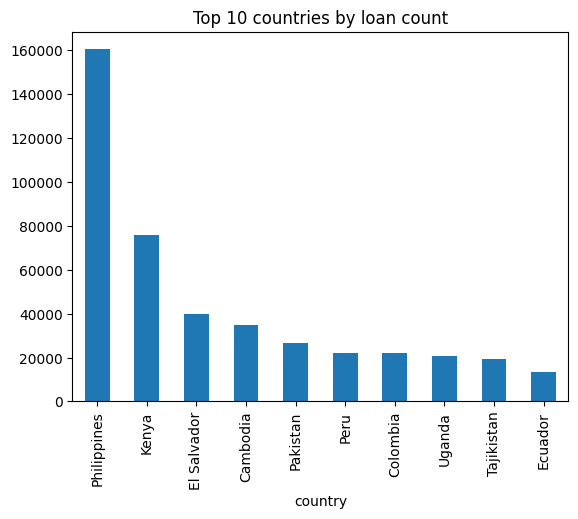

In [41]:
COUNTRY_COL = col_map.get('country', 'country')
top_countries = df[COUNTRY_COL].value_counts().head(10)
print(top_countries)
top_countries.plot(kind='bar', title='Top 10 countries by loan count');


In [42]:
top_loans = df.sort_values('loan_amount_usd', ascending=False).head(10)
display(top_loans[[LOAN_AMT, CURRENCY_COL, 'loan_amount_usd', COUNTRY_COL]])


,loan_amount,currency,loan_amount_usd,country
70499,100000,USD,100000.0,Haiti
660807,50000,USD,50000.0,Pakistan
408465,50000,USD,50000.0,Peru
223120,50000,USD,50000.0,Mexico
43182,50000,USD,50000.0,Kenya
621860,50000,USD,50000.0,Kenya
586970,50000,USD,50000.0,Tanzania
126839,50000,USD,50000.0,Mexico
383723,50000,USD,50000.0,Mexico
548513,50000,USD,50000.0,Zimbabwe


In [ ]:
SECTOR_COL = col_map.get('sector', 'sector')
sector_stats = df.dropna(subset=['loan_amount_usd', SECTOR_COL]).groupby(SECTOR_COL)['loan_amount_usd'].agg(['count','mean','median']).sort_values('mean', ascending=False)
display(sector_stats.head(20))
sector_stats['mean'].head(10).plot(kind='bar', title='Top 10 sectors by mean loan amount (USD)');


,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Cambodia,5338.0,1008.266205,780.333693,100.0000,525.000,1000.0000,1250.000,30000.0
El Salvador,39875.0,667.176176,361.018938,50.0000,400.000,550.0000,1000.000,3000.0
Kenya,75825.0,20.297710,578.286950,0.1725,1.380,2.2425,3.795,50000.0
Philippines,160441.0,6.017120,62.518321,0.4250,3.825,4.6750,7.225,25000.0


<Axes: title={'center': 'loan_amount_usd'}, xlabel='country'>

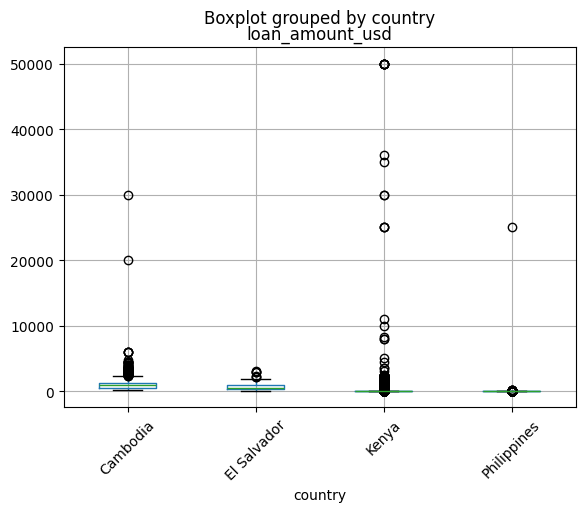

In [43]:
sample_countries = list(df[COUNTRY_COL].value_counts().head(4).index)
selected = df[df[COUNTRY_COL].isin(sample_countries)]
display(selected.groupby(COUNTRY_COL)['loan_amount_usd'].describe())
selected.boxplot(column='loan_amount_usd', by=COUNTRY_COL, rot=45)


In [44]:
currency_of_interest = 'KES'
threshold = 100000
mask = (df[CURRENCY_COL].astype(str).str.upper() == currency_of_interest) & (df[LOAN_AMT] > threshold)
sel = df[mask]
print(len(sel), "loans found")
display(sel[[LOAN_AMT, CURRENCY_COL, 'loan_amount_usd', COUNTRY_COL, SECTOR_COL]].head(20))


0 loans found


,loan_amount,currency,loan_amount_usd,country,sector


,_year,loan_count
0,2014,174234
1,2015,181833
2,2016,197236
3,2017,117902


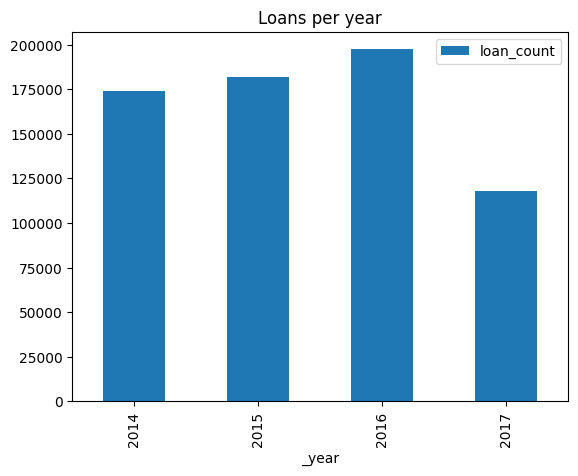

In [45]:
DATE_COL = col_map.get('date', None)
if DATE_COL:
    df['_posted_dt'] = pd.to_datetime(df[DATE_COL], errors='coerce')
    df['_year'] = df['_posted_dt'].dt.year
    counts_by_year = df.groupby('_year').size().rename('loan_count').reset_index()
    display(counts_by_year)
    counts_by_year.plot(x='_year', y='loan_count', kind='bar', title='Loans per year')
else:
    print("No date column detected; set DATE_COL.")


Question 1: Which countries have the most loans?

I want to find the countries that appear most often in the dataset.  
This tells me where Kiva loans are concentrated.



In [46]:
top_countries = df['country'].value_counts().head(10)
top_countries


,count
country,
Philippines,160441
Kenya,75825
El Salvador,39875
Cambodia,34836
Pakistan,26857
Peru,22233
Colombia,21995
Uganda,20601
Tajikistan,19580


Question 2: What are the largest loans after converting to USD?
Loan amounts are in different currencies, so I want to sort the dataset by the converted USD value.


In [47]:
largest_loans = df.sort_values('loan_amount_usd', ascending=False).head(10)
largest_loans[[LOAN_AMT, CURRENCY_COL, 'loan_amount_usd', COUNTRY_COL]]


,loan_amount,currency,loan_amount_usd,country
70499,100000,USD,100000.0,Haiti
660807,50000,USD,50000.0,Pakistan
408465,50000,USD,50000.0,Peru
223120,50000,USD,50000.0,Mexico
43182,50000,USD,50000.0,Kenya
621860,50000,USD,50000.0,Kenya
586970,50000,USD,50000.0,Tanzania
126839,50000,USD,50000.0,Mexico
383723,50000,USD,50000.0,Mexico
548513,50000,USD,50000.0,Zimbabwe


Question 3: Which sectors receive the highest average loan amounts (in USD)?
I want to see which types of business sectors (e.g., agriculture, retail) require more funding.


In [48]:
SECTOR_COL = col_map.get('sector', 'sector')

sector_stats = df.groupby(SECTOR_COL)['loan_amount_usd'].mean().sort_values(ascending=False)
sector_stats


,loan_amount_usd
sector,
Entertainment,1876.875115
Wholesale,1253.782708
Health,1060.612991
Services,904.261056
Education,846.227540
Construction,758.443824
Arts,750.436416
Clothing,670.894263
Personal Use,536.690320


 Question 4: How do loan sizes compare across a selection of countries?
I want to compare the distribution of loan amounts in a few specific countries.


In [49]:
selected_countries = ['Philippines', 'Kenya', 'Uganda', 'Peru']

filtered = df[df[COUNTRY_COL].isin(selected_countries)]
filtered['loan_amount_usd'].describe()


,loan_amount_usd
count,257699.000000
mean,18.626952
std,489.950845
min,0.006250
25%,2.125000
50%,3.825000
75%,5.950000
max,50000.000000


 Question 5: How many loans in KES (Kenyan Shilling) are larger than 100,000 KES?
This combines a string filter on currency and a numeric condition on loan amount.


In [50]:
currency_of_interest = 'KES'
threshold = 100000

mask = (
    df[CURRENCY_COL].astype(str).str.upper() == currency_of_interest
) & (df[LOAN_AMT] > threshold)

large_kes_loans = df[mask]
large_kes_loans.head()


,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,loan_amount_USD,loan_amount_usd,_posted_dt,_year


 Question 6: How many loans were posted each year?
I want to analyze trends in loan activity over time.


In [51]:
DATE_COL = col_map.get('date', None)

df['_posted_dt'] = pd.to_datetime(df[DATE_COL], errors='coerce')
df['_year'] = df['_posted_dt'].dt.year

loans_per_year = df.groupby('_year').size()
loans_per_year


,0
_year,
2014,174234
2015,181833
2016,197236
2017,117902
